# Author: Rajdeep Saha

# Task 2- Prediction Using Unsupervised Machine Learning

# GRIP @ The Sparks Foundation

In this k-means clustering task, I have predicted the optimum number of clusters
and represent it visually from the given 'Iris' Dataset.

# Importing library

In [3]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Step 1- Importing the Dataset

In [4]:
setwd("C:/Users/user/OneDrive/Desktop/Sparks/Task 2")
data<-read.csv("iris.csv")
attach(data)
names(data)

[1] "Id"            "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm"
[5] "PetalWidthCm"  "Species"

# Step 2- Data Observation

In [5]:
head(data,10)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data<-data[,-1]
head(data,5)
str(data)

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


'data.frame':	150 obs. of  5 variables:
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


In [7]:
summary(data)

 SepalLengthCm    SepalWidthCm   PetalLengthCm    PetalWidthCm  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :50  
 Iris-versicolor:50  
 Iris-virginica :50  
                     
                     
                     

# Step 3- Data Visualization

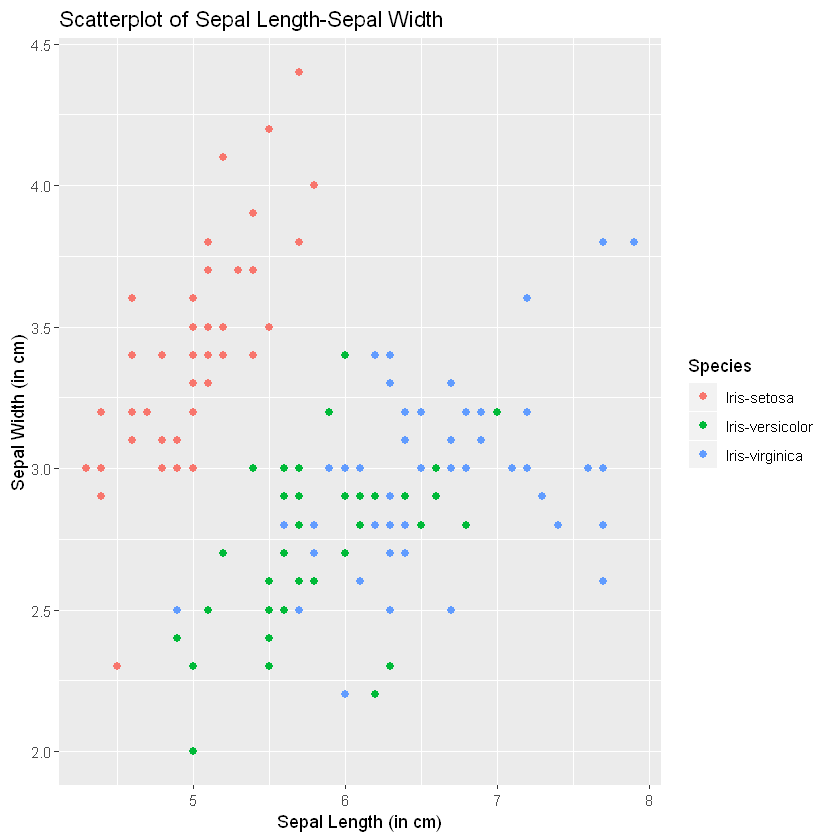

In [8]:
ggplot(data,aes(x=SepalLengthCm,y=SepalWidthCm,col=Species))+
  geom_point(size=2)+
  xlab("Sepal Length (in cm)")+
  ylab("Sepal Width (in cm)")+
  ggtitle("Scatterplot of Sepal Length-Sepal Width")

# Step 4- Choosing Optimum No. of Clusters (Elbow Method)

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


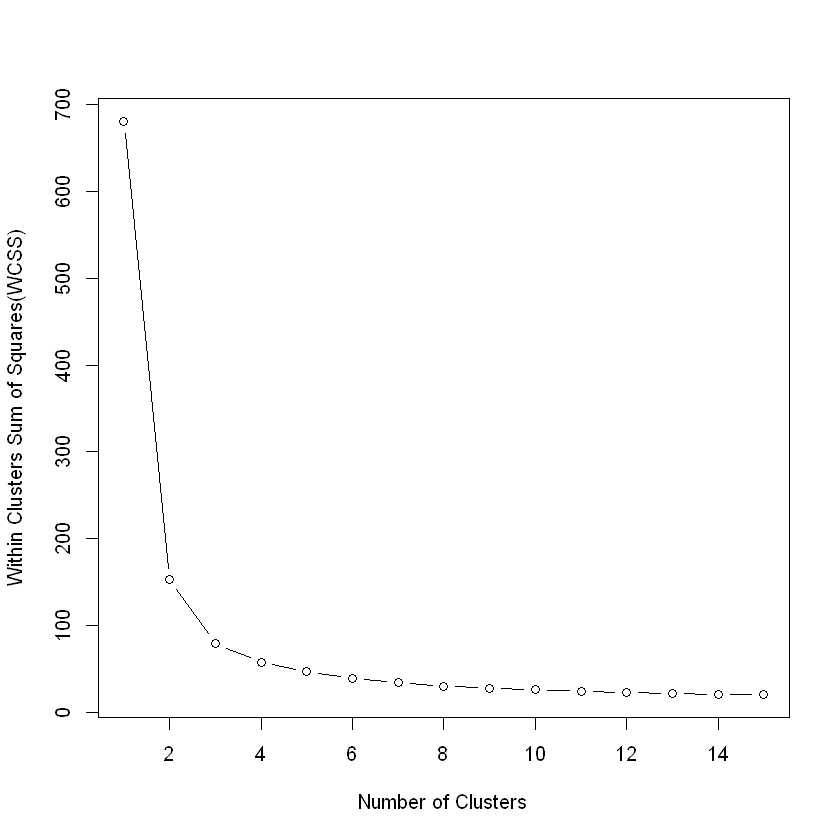

In [9]:
iris_cl=data[,1:4]
head(iris_cl)
set.seed(2021)
wss <-array(0)
for (i in 1:15) {
  km.out <- kmeans(iris_cl, centers = i, nstart = 10, iter.max = 300)
  wss[i] <- km.out$tot.withinss
}
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within Clusters Sum of Squares(WCSS)")

We can see that, as number of clusters increases, WCSS decreases. We can see that, after the number of clusters 3, the decrease in WCSS is minimal. So, we choose the optimum value of k to be 3.

# Step 5- k-means clustering with k=3

In [13]:
kmeans.cl=kmeans(iris_cl,centers=3,nstart=10)
iris_cl$cluster <- as.character(kmeans.cl$cluster)
head(iris_cl)

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
5.4,3.9,1.7,0.4,1


# Step 6- Visualizing the Clusters

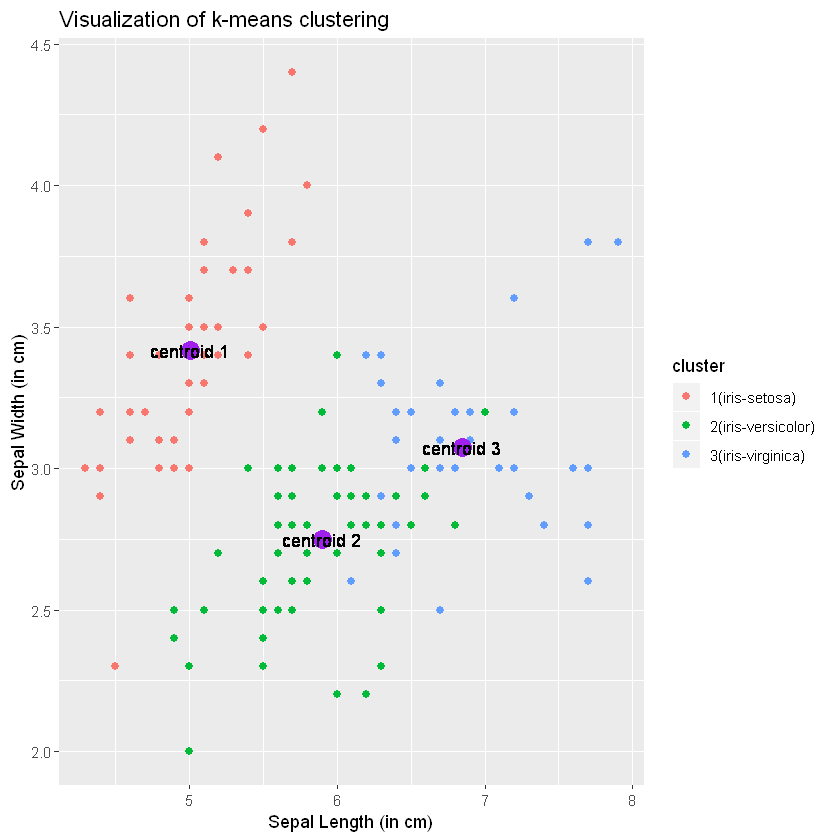

In [12]:
ggplot(iris_cl,aes(x = SepalLengthCm, y =SepalWidthCm,colour=cluster)) +
  geom_point(size=2)+
  geom_point(aes(x=kmeans.cl$center[1,1],y=kmeans.cl$center[1,2]),
  colour="purple",size=5,shape=19)+
  geom_point(aes(x=kmeans.cl$center[2,1],y=kmeans.cl$center[2,2]),
  colour="purple",size=5,shape=19)+
    geom_point(aes(x=kmeans.cl$center[3,1],y=kmeans.cl$center[3,2]),
  colour="purple",size=5,shape=19)+
     geom_text(label="centroid 1",x=kmeans.cl$center[1,1],y=kmeans.cl$center[1,2],color = "black")+
     geom_text(label="centroid 2",x=kmeans.cl$center[2,1],y=kmeans.cl$center[2,2],color = "black")+
     geom_text(label="centroid 3",x=kmeans.cl$center[3,1],y=kmeans.cl$center[3,2],color = "black")+
 scale_shape_discrete(labels = c("1(iris-setosa)", "2(iris-versicolor)","3(iris-virginica)"))+
    scale_color_discrete(labels = c("1(iris-setosa)", "2(iris-versicolor)","3(iris-virginica)"))+
      xlab("Sepal Length (in cm)")+
  ylab("Sepal Width (in cm)")+
  ggtitle("Visualization of k-means clustering")


I have indicated the centroids and plotted the predicted graph, which is pretty similar to the actual graph.

# Conclusion:

I have successfully obtained the optimum number of clusters for this 'Iris' dataset and run the k-means algorithm with the chosen number of clusters.

# Thank you